In [186]:
# read data into array.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import linear_model
import pandas as pd
import seaborn as sns
teleplay_data = pd.read_csv('Teleplay.csv', sep=',',header=None)
Newteleplay_data = pd.read_csv('New_Teleplay.csv', sep=',',header=None)
data = np.array(teleplay_data)
predict_data = np.array(Newteleplay_data)

In [187]:
# delete data with null value 
nullDuplicateData = np.array(np.where((teleplay_data.isnull().values==True)))
nullData = np.unique(nullDuplicateData[0])
#delete rows with null data
trainingData = np.delete(data,nullData,0)
#delete first row as it is not data
trainingData = np.delete(trainingData,0,0)
predict_data = np.delete(predict_data,0,0)

x = trainingData
#only need genre, type, episodes and members
deleteFeatures = [0,1,5]
#x[0]:genre; x[1]:type; x[2]:episodes; x[3]:members
x = np.delete(trainingData,deleteFeatures,1)
predict_data = np.delete(predict_data,deleteFeatures,1)
print(x)
print(predict_data)

[['Drama, Romance, School, Supernatural' 'long' '1' '200630']
 ['Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' 'medium'
  '51' '114262']
 ['Sci-Fi, Thriller' 'medium' '24' '673572']
 ...
 ['Restricted' 'short' '4' '219']
 ['Restricted' 'short' '1' '175']
 ['Restricted' 'long' '1' '142']]
[['Comedy, Horror, School, Supernatural' 'medium' '33' '341']
 ['Action, Dementia, Drama, Sci-Fi' 'long' '1' '8230']
 ['Music' 'Music' '1' '126']
 ...
 ['Dementia' 'ONA' '1' '727']
 ['Adventure, Comedy, Kids' 'long' '1' '143']
 ['Adventure, Comedy, Fantasy, Sci-Fi, Shounen' 'long' '1' '51083']]


In [188]:
#feature scaling and find how many genres in total

genres = x[0][0].split(",")
genres = np.char.strip(genres)
#for data in teleplay.csv
for i in range(x.shape[0]):
    #change types to float
    if(x[i][1] == "short"):
        x[i][1] = 1.0
    elif(x[i][1] == "medium"):
        x[i][1] = 2.0
    elif(x[i][1] == "long"):
        x[i][1] = 3.0
    elif(x[i][1] == "Special"):
        x[i][1] = 4.0
    elif(x[i][1] == "ONA"):
        x[i][1] = 5.0
    else:
        x[i][1] = 0.0
    #change str to float for episodes and members
    if (x[i][2] == "Unknown"):
        x[i][2] = 0.0
    else:
        x[i][2] = float(x[i][2])
    #data smoothing for members
    x[i][3] = np.log1p(float(x[i][3]))
    #find how many genres in total
    checkDuplicateGenres = x[i][0].split(",")
    checkDuplicateGenres = np.char.strip(checkDuplicateGenres)
    for j in range (len(checkDuplicateGenres)):
        if(checkDuplicateGenres[j] in genres):
            continue
        else:
            genres = np.append(genres,checkDuplicateGenres[j])
            
print(genres)
print(len(genres))

#for data in Newteleplay.csv
for i in range(predict_data.shape[0]):
    #change types to float
    if(predict_data[i][1] == "short"):
        predict_data[i][1] = 1.0
    elif(predict_data[i][1] == "medium"):
        predict_data[i][1] = 2.0
    elif(predict_data[i][1] == "long"):
        predict_data[i][1] = 3.0
    elif(predict_data[i][1] == "Special"):
        predict_data[i][1] = 4.0
    elif(predict_data[i][1] == "ONA"):
        predict_data[i][1] = 5.0
    else:
        predict_data[i][1] = 0.0
    #change str to float for episodes and members
    if (predict_data[i][2] == "Unknown"):
        predict_data[i][2] = 0.0
    else:
        predict_data[i][2] = float(predict_data[i][2])
    #data smoothing for members
    predict_data[i][3] = np.log1p(float(predict_data[i][3]))
    

['Drama' 'Romance' 'School' 'Supernatural' 'Action' 'Comedy' 'Historical'
 'Parody' 'Samurai' 'Sci-Fi' 'Shounen' 'Thriller' 'Sports' 'Adventure'
 'Super Power' 'Military' 'Space' 'Fantasy' 'Slice of Life' 'Music'
 'Mystery' 'Seinen' 'Vampire' 'Mecha' 'Shoujo' 'Horror' 'Police'
 'Psychological' 'Demons' 'Josei' 'Shounen Ai' 'Game' 'Magic' 'Ecchi'
 'Martial Arts' 'Dementia' 'Harem' 'Cars' 'Kids' 'Shoujo Ai' 'Restricted'
 'Yaoi' 'Yuri']
43


In [189]:
#one hot encoding for genres: 
#for data in teleplay.csv
temp = x
temp = np.delete(temp,0,1)
genres = genres.tolist()
for i in range(len(genres)):
    temp = np.insert(temp, 0, 0.0, axis=1)
for i in range(x.shape[0]):
    splitGenres = x[i][0].split(",")
    splitGenres = np.char.strip(splitGenres)
    for k in range(len(splitGenres)):
        index = genres.index(splitGenres[k])
        temp[i][index] = 1.0
x = temp
print(x)

#for data in Newteleplay.csv
temp1 = predict_data
temp1 = np.delete(temp1,0,1)
for i in range(len(genres)):
    temp1 = np.insert(temp1, 0, 0.0, axis=1)
for i in range(predict_data.shape[0]):
    if(pd.isnull(predict_data[i][0])):
        continue
    else:
        splitGenres = predict_data[i][0].split(",")
        splitGenres = np.char.strip(splitGenres)
        for k in range(len(splitGenres)):
            index = genres.index(splitGenres[k])
            temp1[i][index] = 1.0
predict_data = temp1
#print(predict_data)

[[1.0 1.0 1.0 ... 3.0 1.0 12.209222678961282]
 [0.0 0.0 0.0 ... 2.0 51.0 11.646258087841353]
 [0.0 0.0 0.0 ... 2.0 24.0 13.420351657971512]
 ...
 [0.0 0.0 0.0 ... 1.0 4.0 5.393627546352362]
 [0.0 0.0 0.0 ... 1.0 1.0 5.170483995038151]
 [0.0 0.0 0.0 ... 3.0 1.0 4.962844630259907]]


In [190]:
#reduce the dimension of x to 1 dimension

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
#print(pca.singular_values_)
x = np.array(principalComponents)

#to reduce the dimensions of data features of NewTeleplay.csv
principalComponents = pca.fit_transform(predict_data)
#print(pca.singular_values_)
predict_data = np.array(principalComponents)


In [191]:
#rating
y = []
for i in range(trainingData.shape[0]):
    y.append(trainingData[i][5])

y = np.array(y)
y = y.astype(np.float) #change str to float

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.33, random_state=42)

print(pd.DataFrame(x))
print(train_x.shape)
print(train_y.shape)

              0
0    -11.350893
1     38.651031
2     11.651656
3     38.651339
4     -2.349454
...         ...
9967 -11.356684
9968 -11.356839
9969  -8.356648
9970 -11.356888
9971 -11.359098

[9972 rows x 1 columns]
(6681, 1)
(6681,)


Coefficients: 
 [0.0013717]
Mean squared error: 1.05
Coefficient of determination: 0.01
Training data accuracy:  0.005589947119396754
Test data accuracy:  0.009051626049798034


<AxesSubplot:title={'center':'Predict the rating'}, xlabel='x', ylabel='Predict Rating'>

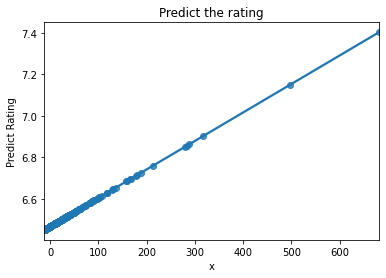

In [193]:
# Model Initialization

model = LinearRegression()
model.fit(train_x,train_y)
y_pred = model.predict(test_x)
predict_rating = model.predict(predict_data)

print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(test_y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(test_y, y_pred))
train_score = model.score(train_x,train_y)
test_score = model.score(test_x,test_y)
print("Training data accuracy: ",train_score)
print("Test data accuracy: ",test_score)
# Plot outputs
    
plt.title("Predict the rating")
#plt.scatter(test_x, test_y,  color='blue')
#plt.plot(test_x, y_pred, color='red', linewidth=3)
plt.ylabel("Predict Rating")
plt.xlabel("x")
#plt.show()
sns.regplot(x=test_x, y=y_pred)

In [194]:
#insert the rating to NewTeleply.csv

predict_rating = np.around(predict_rating,decimals=2)
print(predict_rating)
#predict_rating = np.insert(predict_rating, 0, 'rating')
Newteleplay_data['rating'] = predict_rating
Newteleplay_data.to_csv("18063466D.csv",index = False)

[6.5  6.45 6.45 ... 6.45 6.45 6.45]


ValueError: Length of values (2090) does not match length of index (2091)